
# Unit 12 - Tales from the Crypto
​
---
​
Unit 12 - Tales from the Crypto

## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [24]:
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import newsapi
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ryanlee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!

api_key = "ada56916ddbb4e30a18c4fab27aacf01"

In [39]:
from newsapi import NewsApiClient


newsapi = NewsApiClient(api_key='ada56916ddbb4e30a18c4fab27aacf01')

In [40]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

import json

btc_headlines = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy')


with open('btc.json', 'w') as json_file:
    json.dump(btc_headlines, json_file)

In [41]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

eth_headlines = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy')


with open('eth.json', 'w') as json_file:
    json.dump(eth_headlines, json_file)

In [42]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
from pandas import json_normalize
btc = pd.read_json("btc.json")
btc_df = json_normalize(btc["articles"])
btc_df.drop(["author","title", "url", "urlToImage",
             "publishedAt","content","source.id","source.name"],axis = 1, inplace = True)
sentiment = btc_df.apply(lambda x : analyzer.polarity_scores(x["description"]), axis=1)
btc_df["Compund"] = sentiment.apply(lambda x : x.get("compound"))
btc_df["Positive"] = sentiment.apply(lambda x : x.get("pos"))
btc_df["Neutral"] = sentiment.apply(lambda x : x.get("neu"))
btc_df["Negative"] = sentiment.apply(lambda x : x.get("neg"))
btc_df

,description,Compund,Positive,Neutral,Negative
0,Whether you’re looking to make a larger invest...,-0.0258,0.033,0.932,0.035
1,"As it promised earlier this year, Tesla now ac...",0.5859,0.194,0.806,0.000
2,The inevitable has happened: You can now purch...,0.3182,0.054,0.946,0.000
3,Tesla made headlines earlier this year when it...,0.2023,0.042,0.958,0.000
4,National Burrito Day lands on April Fool’s Day...,0.8462,0.207,0.793,0.000
5,India’s legislature is reportedly considering ...,-0.2732,0.071,0.826,0.103
6,The hacker behind last year’s big Twitter hack...,-0.7964,0.000,0.794,0.206
7,It seems like everyone is making money off of ...,0.4588,0.089,0.911,0.000
8,Data centers and bitcoin mining operations are...,0.7003,0.201,0.717,0.082
9,A proposed law in India would make it a crime ...,-0.2500,0.057,0.864,0.080


In [43]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

eth = pd.read_json("eth.json")
eth_df = json_normalize(eth["articles"])
eth_df.drop(["author","title", "url", "urlToImage",
             "publishedAt","content","source.id","source.name"],axis = 1, inplace = True)
sentiment = eth_df.apply(lambda x : analyzer.polarity_scores(x["description"]), axis=1)
eth_df["Compund"] = sentiment.apply(lambda x : x.get("compound"))
eth_df["Positive"] = sentiment.apply(lambda x : x.get("pos"))
eth_df["Neutral"] = sentiment.apply(lambda x : x.get("neu"))
eth_df["Negative"] = sentiment.apply(lambda x : x.get("neg"))
eth_df

,description,Compund,Positive,Neutral,Negative
0,India’s legislature is reportedly considering ...,-0.2732,0.071,0.826,0.103
1,Whether you’re looking to make a larger invest...,-0.0258,0.033,0.932,0.035
2,"Most NFTs are bought and sold with Ethereum, a...",-0.1027,0.056,0.878,0.066
3,Payment card network Visa has announced that t...,0.0000,0.000,1.000,0.000
4,The NFT craze has been an intriguing moment fo...,0.5650,0.147,0.774,0.079
5,"Move fast, break things, get hacked. That’s wh...",-0.7096,0.000,0.862,0.138
6,Here's everything you need to know about non-f...,-0.1531,0.000,0.955,0.045
7,OpenSea has been one of a handful of NFT marke...,0.5574,0.106,0.894,0.000
8,"MetaMask, one of the most popular web wallets ...",0.6590,0.116,0.884,0.000
9,A security breach at cryptocurrency platform R...,0.0258,0.097,0.831,0.072


In [46]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

btc_df.describe()

,Compund,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.147720,0.079300,0.878250,0.042500
std,0.440491,0.075117,0.084935,0.063659
min,-0.796400,0.000000,0.701000,0.000000
25%,-0.081850,0.024750,0.821000,0.000000
50%,0.202300,0.064000,0.906000,0.000000
75%,0.401050,0.092500,0.935500,0.080500
max,0.846200,0.239000,1.000000,0.206000


In [47]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,Compund,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.012670,0.039850,0.923450,0.036750
std,0.318486,0.047562,0.072606,0.043382
min,-0.709600,0.000000,0.774000,0.000000
25%,-0.153100,0.000000,0.863500,0.000000
50%,0.000000,0.016500,0.939000,0.017500
75%,0.006450,0.062750,1.000000,0.073750
max,0.659000,0.147000,1.000000,0.138000


### Questions:

Q: Which coin had the highest mean positive score?

A:  bitcoin

Q: Which coin had the highest compound score?

A: bitcoin

Q. Which coin had the highest positive score?

A: bitcoin

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [48]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [78]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!

nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

addl_stopwords = [',', '', 'https', 'http', 'btc', 'bitcoin', 'eth', 'ethereum']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ryanlee/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package reuters to /Users/ryanlee/nltk_data...
[nltk_data] Downloading package punkt to /Users/ryanlee/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [79]:
def tokenizer(text):
    """Tokenizes text."""
    
   # Create a list of the words
    text = word_tokenize(text)
    
    # Convert the words to lowercase
    text = [word.lower() for word in text]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    
    # Remove the stop words    
    sw = set(stopwords.words('english') + addl_stopwords)

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    return text

In [81]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
nltk.download('wordnet')
btc_df["tokens"] = btc_df.apply(lambda x : tokenizer(x["description"]), axis = 1)
btc_df

[nltk_data] Downloading package wordnet to /Users/ryanlee/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,description,Compund,Positive,Neutral,Negative,tokens
0,Whether you’re looking to make a larger invest...,-0.0258,0.033,0.932,0.035,"[whether, looking, make, larger, investment, w..."
1,"As it promised earlier this year, Tesla now ac...",0.5859,0.194,0.806,0.000,"[promised, earlier, year, tesla, accepts, paym..."
2,The inevitable has happened: You can now purch...,0.3182,0.054,0.946,0.000,"[inevitable, ha, happened, purchase, tesla, ve..."
3,Tesla made headlines earlier this year when it...,0.2023,0.042,0.958,0.000,"[tesla, made, headline, earlier, year, took, s..."
4,National Burrito Day lands on April Fool’s Day...,0.8462,0.207,0.793,0.000,"[national, burrito, day, land, april, fool, da..."
5,India’s legislature is reportedly considering ...,-0.2732,0.071,0.826,0.103,"[india, legislature, reportedly, considering, ..."
6,The hacker behind last year’s big Twitter hack...,-0.7964,0.000,0.794,0.206,"[hacker, behind, last, year, big, twitter, hac..."
7,It seems like everyone is making money off of ...,0.4588,0.089,0.911,0.000,"[seems, like, everyone, making, money, nfts, n..."
8,Data centers and bitcoin mining operations are...,0.7003,0.201,0.717,0.082,"[data, center, mining, operation, becoming, hu..."
9,A proposed law in India would make it a crime ...,-0.2500,0.057,0.864,0.080,"[proposed, law, india, would, make, crime, min..."


In [85]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

eth_df["token"] = eth_df.apply(lambda x : tokenizer(x["description"]), axis = 1)
eth_df

,description,Compund,Positive,Neutral,Negative,token
0,India’s legislature is reportedly considering ...,-0.2732,0.071,0.826,0.103,"[india, legislature, reportedly, considering, ..."
1,Whether you’re looking to make a larger invest...,-0.0258,0.033,0.932,0.035,"[whether, looking, make, larger, investment, w..."
2,"Most NFTs are bought and sold with Ethereum, a...",-0.1027,0.056,0.878,0.066,"[nfts, bought, sold, cryptocurrency, guzzles, ..."
3,Payment card network Visa has announced that t...,0.0000,0.000,1.000,0.000,"[payment, card, network, visa, ha, announced, ..."
4,The NFT craze has been an intriguing moment fo...,0.5650,0.147,0.774,0.079,"[nft, craze, ha, intriguing, moment, digital, ..."
5,"Move fast, break things, get hacked. That’s wh...",-0.7096,0.000,0.862,0.138,"[move, fast, break, thing, get, hacked, happen..."
6,Here's everything you need to know about non-f...,-0.1531,0.000,0.955,0.045,"[everything, need, know, nonfungible, token, l..."
7,OpenSea has been one of a handful of NFT marke...,0.5574,0.106,0.894,0.000,"[opensea, ha, one, handful, nft, marketplace, ..."
8,"MetaMask, one of the most popular web wallets ...",0.6590,0.116,0.884,0.000,"[metamask, one, popular, web, wallet, cryptocu..."
9,A security breach at cryptocurrency platform R...,0.0258,0.097,0.831,0.072,"[security, breach, cryptocurrency, platform, r..."


### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [53]:
from collections import Counter
from nltk import ngrams

In [89]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df["tokens"]]
dict(btc_bigram_counts[0].most_common(10))

{('whether', 'looking'): 1,
 ('looking', 'make'): 1,
 ('make', 'larger'): 1,
 ('larger', 'investment'): 1,
 ('investment', 'want'): 1,
 ('want', 'dabble'): 1,
 ('dabble', 'cryptocurrencies'): 1,
 ('cryptocurrencies', 'purchase'): 1,
 ('purchase', 'cash'): 1,
 ('cash', 'litecoin'): 1}

In [90]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df["token"]]
dict(eth_bigram_counts[0].most_common(10))

{('india', 'legislature'): 1,
 ('legislature', 'reportedly'): 1,
 ('reportedly', 'considering'): 1,
 ('considering', 'neartotal'): 1,
 ('neartotal', 'ban'): 1,
 ('ban', 'private'): 1,
 ('private', 'cryptocurrencies'): 1,
 ('cryptocurrencies', 'like'): 1,
 ('like', 'including'): 1,
 ('including', 'owning'): 1}

In [96]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=20):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [103]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
btclist = []
for tokens in btc_df.tokens:
    btclist += tokens
btc_df["token count"] = token_count(btclist)
token_count(btclist)

[('cryptocurrency', 8),
 ('tesla', 7),
 ('year', 5),
 ('ha', 5),
 ('li', 5),
 ('cryptocurrencies', 4),
 ('paypal', 4),
 ('elon', 4),
 ('musk', 4),
 ('like', 4),
 ('crypto', 4),
 ('investment', 3),
 ('according', 3),
 ('india', 3),
 ('digital', 3),
 ('new', 3),
 ('report', 3),
 ('million', 3),
 ('make', 2),
 ('purchase', 2)]

In [102]:
# Use token_count to get the top 10 words for ethereum
# YOUR CODE HERE!
ethlist = []
for tokens in eth_df.token:
    ethlist += tokens
eth_df["token count"] = token_count(ethlist)
token_count(ethlist)

[('cryptocurrency', 8),
 ('crypto', 7),
 ('ha', 5),
 ('million', 5),
 ('li', 5),
 ('cryptocurrencies', 4),
 ('nfts', 4),
 ('new', 4),
 ('nft', 4),
 ('thing', 4),
 ('platform', 4),
 ('token', 4),
 ('india', 3),
 ('currency', 3),
 ('digital', 3),
 ('whether', 3),
 ('artist', 3),
 ('art', 3),
 ('blockchain', 3),
 ('craze', 3)]

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [106]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

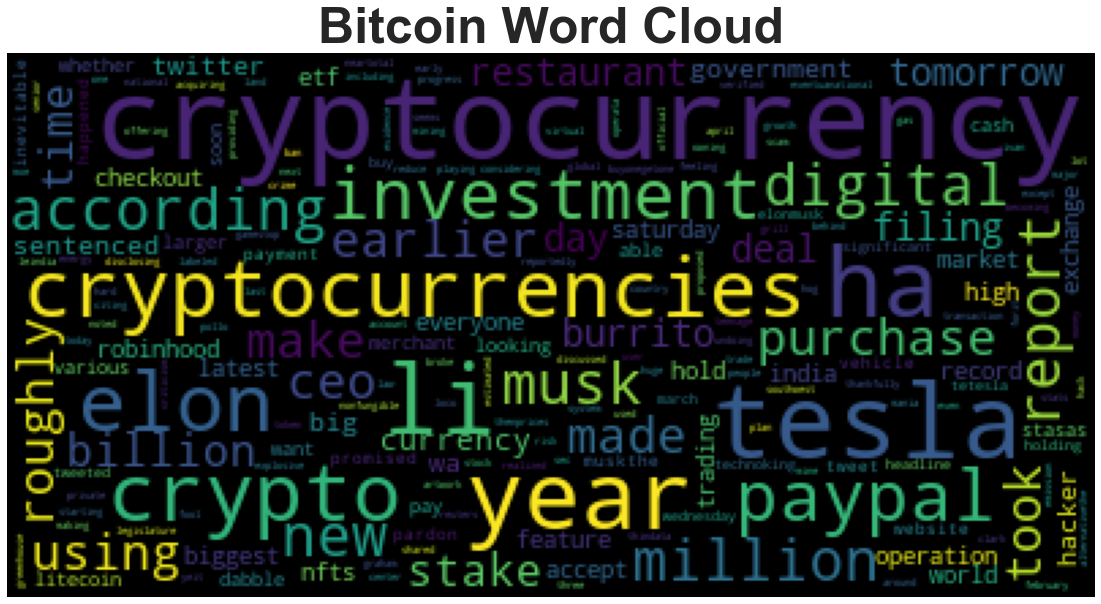

In [130]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!


btc_corpus = ''
sw = set(stopwords.words('english') + addl_stopwords)
for token in btc_df.description:
    btc_corpus += token
long_string = " ".join(str(x) for x in tokenizer(btc_corpus))
wc = WordCloud(collocations=False).generate(long_string)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

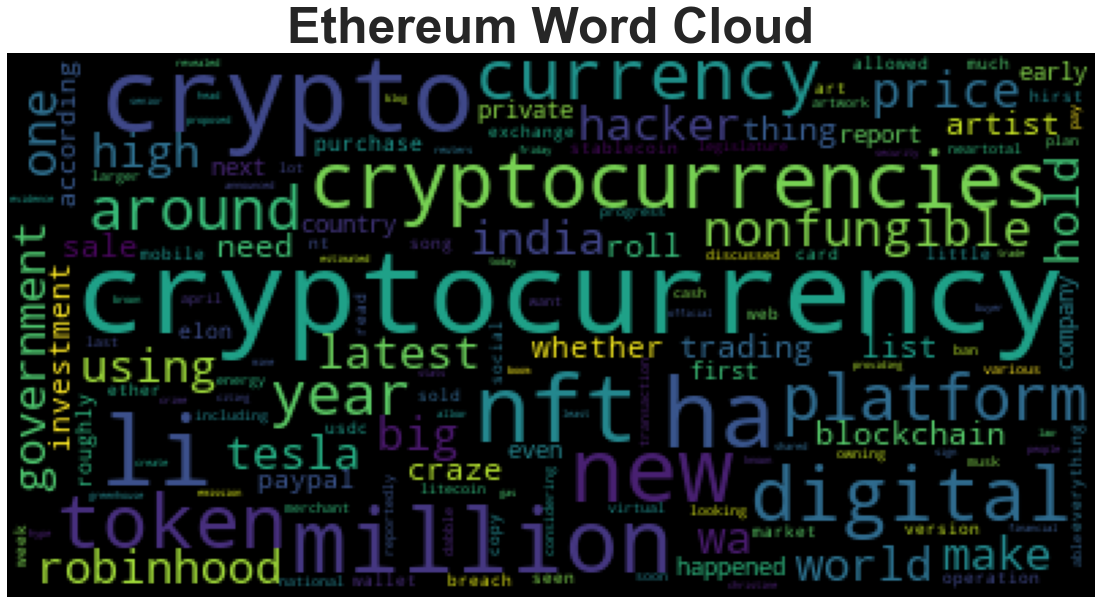

In [129]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!


eth_corpus = ''
sw = set(stopwords.words('english') + addl_stopwords)
for token in eth_df.description:
    eth_corpus += token
long_string = " ".join(str(x) for x in tokenizer(btc_corpus))
wc = WordCloud(collocations=False).generate(long_string)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [116]:
import spacy
from spacy import displacy

In [117]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.7 MB 15.0 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [118]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [131]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_corpus

"Whether you’re looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, you’ll be able to pay various merchants using your cryptocurrency stas…As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla's website and a tweet from CEO Elon Musk.The inevitable has happened: You can now purchase a Tesla vehicle with Bitcoin.\xa0\nThis is according to Tesla CEO, pardon, Technoking Elon Musk, who tweeted it on Wednesday.\xa0\n\nYou can now buy a Tesla with Bitcoin\r\n\n— Elon Musk (@elonmusk) March 24, 2021\r\n\n\r\n\nTe…Tesla made headlines earlier this year when it took out significant holdings in bitcoin, acquiring a roughly $1.5 billion stake at then-prices in early February. At the time, it also noted in an SEC filing disclosing the transaction that it could also eventua…National Burrito Day lands on April Fool’s Day this year, but thankfu

In [132]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_ner = nlp(btc_corpus)
# Add a title to the document
# YOUR CODE HERE!
btc_ner.user_data["title"]="Bitcoin NER"

In [133]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_ner,style="ent")

In [134]:
# List all Entities
# YOUR CODE HERE!
btc_ents = set([ent.text for ent in btc_ner.ents])
btc_ents

{'$6 Billion',
 '$6.5 million',
 '5',
 '60,000.PayPal',
 '6B',
 '>Elon Musk',
 'April Fool’s Day',
 'BTCC',
 'Bitcoin',
 'Bitcoin Cash',
 'Bitcoin Magazine',
 'Bitcoin or Ethereum',
 'Bitcoin, Ethereum',
 'Block',
 'Bobby Lee',
 'Christine Brown',
 'Coinbase',
 'Elon Musk',
 'Fidelity',
 'Friday',
 'Funko',
 'GameStop’s',
 'Graham Ivan Clark',
 'India',
 'Julian Satterthwaite',
 'March 24, 2021',
 'National Burrito Day',
 'Pollo Loco',
 'Regulators',
 'Reuters',
 'Robinhood',
 'Robinhood’s',
 'SEC',
 'Saturday',
 'Tesla',
 'Tesla Cybertruck',
 'The Wise Origin Bitcoin ETF',
 'TokenHead',
 'Twitter',
 'Twitter’s',
 'Wednesday',
 'a big year',
 'earlier this year',
 'early February',
 'first',
 'last year’s',
 'millions',
 'one',
 'roughly $1.5 billion',
 'roughly 8 million',
 'the U.S. Securities and Exchange Commission',
 'this morning',
 'this year',
 'three',
 'today',
 'tomorrow',
 'up to $59,755.Bitcoin'}

___

### Ethereum NER

In [135]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

eth_corpus

"India’s legislature is reportedly considering a near-total ban on private cryptocurrencies like Bitcoin or Ethereum, including owning the virtual currency. The government has discussed plans for a national digital currency as an alternative.Whether you’re looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, you’ll be able to pay various merchants using your cryptocurrency stas…Most NFTs are bought and sold with Ethereum, a cryptocurrency that guzzles up energy and pumps out a lot of greenhouse gas emissions. Artists are fighting over whether there can be a more sustainable future for crypto art.Payment card network Visa has announced that transactions can be settled using USD Coin (USDC), a stablecoin powered by the Ethereum blockchain. Crypto.com is the first company to test the new capability with its own Visa-branded cards. USDC is a stablecoin c…The NFT craze ha

In [136]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_ner = nlp(eth_corpus)
# Add a title to the document
# YOUR CODE HERE!
eth_ner.user_data["title"]="Ethereum NER"

In [138]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_ner, style = 'ent')

In [141]:
# List all Entities
# YOUR CODE HERE!
eth_ents = ([ent. text for ent in eth_ner.ents])

eth_ents

['India',
 'Bitcoin or Ethereum',
 'Bitcoin, Ethereum',
 'Bitcoin Cash',
 'Ethereum',
 'Visa',
 'USD Coin',
 'Ethereum',
 'Crypto.com',
 'first',
 'Visa',
 'USDC',
 'NFT',
 'Ethereum',
 'Last week',
 'Roll',
 '$5.7 mill',
 'Mashable Video',
 'NFT',
 'recent weeks',
 'MetaMask',
 'one',
 'Ethereum',
 'September 2020',
 'one',
 'about $5.7 million',
 'early Sunday',
 'a big year',
 'Robinhood',
 'today',
 'Christine Brown',
 'Robinhood’s',
 'first',
 '350',
 'millions of dollars',
 'Logan Paul',
 'Paris',
 'Hilton',
 'Lindsay Lohan',
 'Rob Gronk',
 '36.32',
 'April 3',
 '90%',
 'FinTech',
 'Last month',
 'hours',
 'Beeple’s',
 '$69 million',
 'NFT',
 '24',
 '24',
 'around $7.5 million',
 'India',
 'Reuters',
 'roughly 8 million',
 'India',
 '10,000',
 'second',
 'Friday',
 '2,077',
 'around 11 a.m. ET']